<a href="https://colab.research.google.com/github/lishav123/MLS-track-notes-/blob/main/Introduction_to_DeepLearning_with_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch

torch.tensor([1, 2, 3, 4, 5])

tensor([1, 2, 3, 4, 5])

In [2]:
from sklearn.datasets import load_iris

X = torch.tensor(load_iris().data).float()
y = torch.tensor(load_iris().target).long()

model = torch.nn.Sequential(
    torch.nn.Linear(4, 3),
    torch.nn.ReLU(),
    torch.nn.Linear(3, 14),
    torch.nn.ReLU(),
    torch.nn.Linear(14, 14),
    torch.nn.ReLU(),
    torch.nn.Linear(14, 4),
    torch.nn.ReLU(),
    torch.nn.Linear(4, 3),
    torch.nn.Softmax(dim=1)
)

optim = torch.optim.Adam(model.parameters())
loss_fn = torch.nn.CrossEntropyLoss()

for epoch in range(1000):
    y_pred = model(X)
    loss = loss_fn(y_pred, y)
    optim.zero_grad()
    loss.backward()
    optim.step()

loss = loss_fn(model(X), y)
print(loss)

tensor(0.6169, grad_fn=<NllLossBackward0>)


In [3]:
from sklearn.metrics import accuracy_score

accuracy_score(y, torch.argmax(model(X), dim=1))

0.9933333333333333

In [4]:
import torch

tempratures = torch.tensor([[32.2, 33.4, 44.5], [33.2, 44.5, 34.0]])
tempratures

tensor([[32.2000, 33.4000, 44.5000],
        [33.2000, 44.5000, 34.0000]])

In [5]:
from sklearn.datasets import load_digits
from torch.utils.data import TensorDataset

dataset = TensorDataset(torch.tensor(load_digits().data).float(), torch.tensor(load_digits().target).long())
input_sample, label_sample = dataset[4]
input_sample.shape, label_sample

(torch.Size([64]), tensor(4))

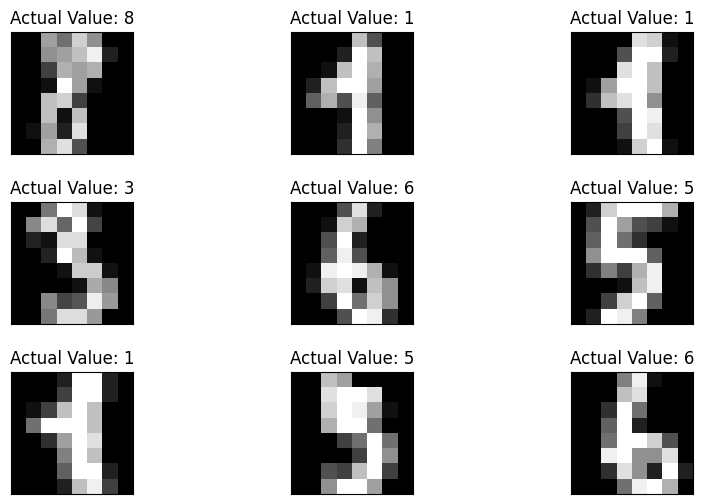

In [6]:
import matplotlib.pyplot as plt
from random import seed, randint

seed(10)
index = [randint(1, 50) for i in range(9)]

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 6))

for i in range(3):
  for j in range(3):
    x = randint(1, 50)
    axes[i][j].imshow(dataset[x][0].reshape(8, 8), cmap='gray')
    axes[i][j].set_title(f"Actual Value: {dataset[x][1]}")
    axes[i][j].tick_params(axis='both', which='both', length=0,
                   labelbottom=False, labelleft=False)
fig.subplots_adjust(hspace=0.4, wspace=0.3)

In [7]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score

# Ensure the dataset is available (already defined in cell 81TH9UjFwa6l)
if 'dataset' not in locals():
    X_digits = torch.tensor(load_digits().data).float()
    y_digits = torch.tensor(load_digits().target).long()
    dataset = TensorDataset(X_digits, y_digits)

# Define the Artificial Neural Network (ANN) model
class DigitClassifier(torch.nn.Module):
    def __init__(self):
        super().__init__()
        # Input layer: 64 features for 8x8 flattened images
        self.layer_1 = torch.nn.Linear(64, 128)
        self.relu_1 = torch.nn.ReLU()
        # Hidden layer
        self.layer_2 = torch.nn.Linear(128, 64)
        self.relu_2 = torch.nn.ReLU()
        # Output layer: 10 classes for digits 0-9
        self.layer_3 = torch.nn.Linear(64, 10)

    def forward(self, x):
        x = self.relu_1(self.layer_1(x))
        x = self.relu_2(self.layer_2(x))
        x = self.layer_3(x)
        return x

model_digits = DigitClassifier()

# Define loss function and optimizer
loss_fn_digits = torch.nn.CrossEntropyLoss()
optimizer_digits = torch.optim.Adam(model_digits.parameters(), lr=0.001)

# Create DataLoader for batching
batch_size = 32
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Training loop
epochs = 50
print("Starting training for digit classifier...")
for epoch in range(epochs):
    for X_batch, y_batch in dataloader:
        # Forward pass
        y_pred = model_digits(X_batch)
        loss = loss_fn_digits(y_pred, y_batch)

        # Backward and optimize
        optimizer_digits.zero_grad()
        loss.backward()
        optimizer_digits.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

print("Training finished.")

# Evaluate the model
model_digits.eval() # Set model to evaluation mode
with torch.no_grad():
    all_preds = []
    all_labels = []
    for X_batch, y_batch in dataloader:
        outputs = model_digits(X_batch)
        _, predicted = torch.max(outputs.data, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(y_batch.cpu().numpy())

accuracy = accuracy_score(all_labels, all_preds)
print(f'Accuracy of the digit classification model: {accuracy:.4f}')

Starting training for digit classifier...
Epoch [10/50], Loss: 0.0651
Epoch [20/50], Loss: 0.0015
Epoch [30/50], Loss: 0.0075
Epoch [40/50], Loss: 0.0003
Epoch [50/50], Loss: 0.0004
Training finished.
Accuracy of the digit classification model: 1.0000


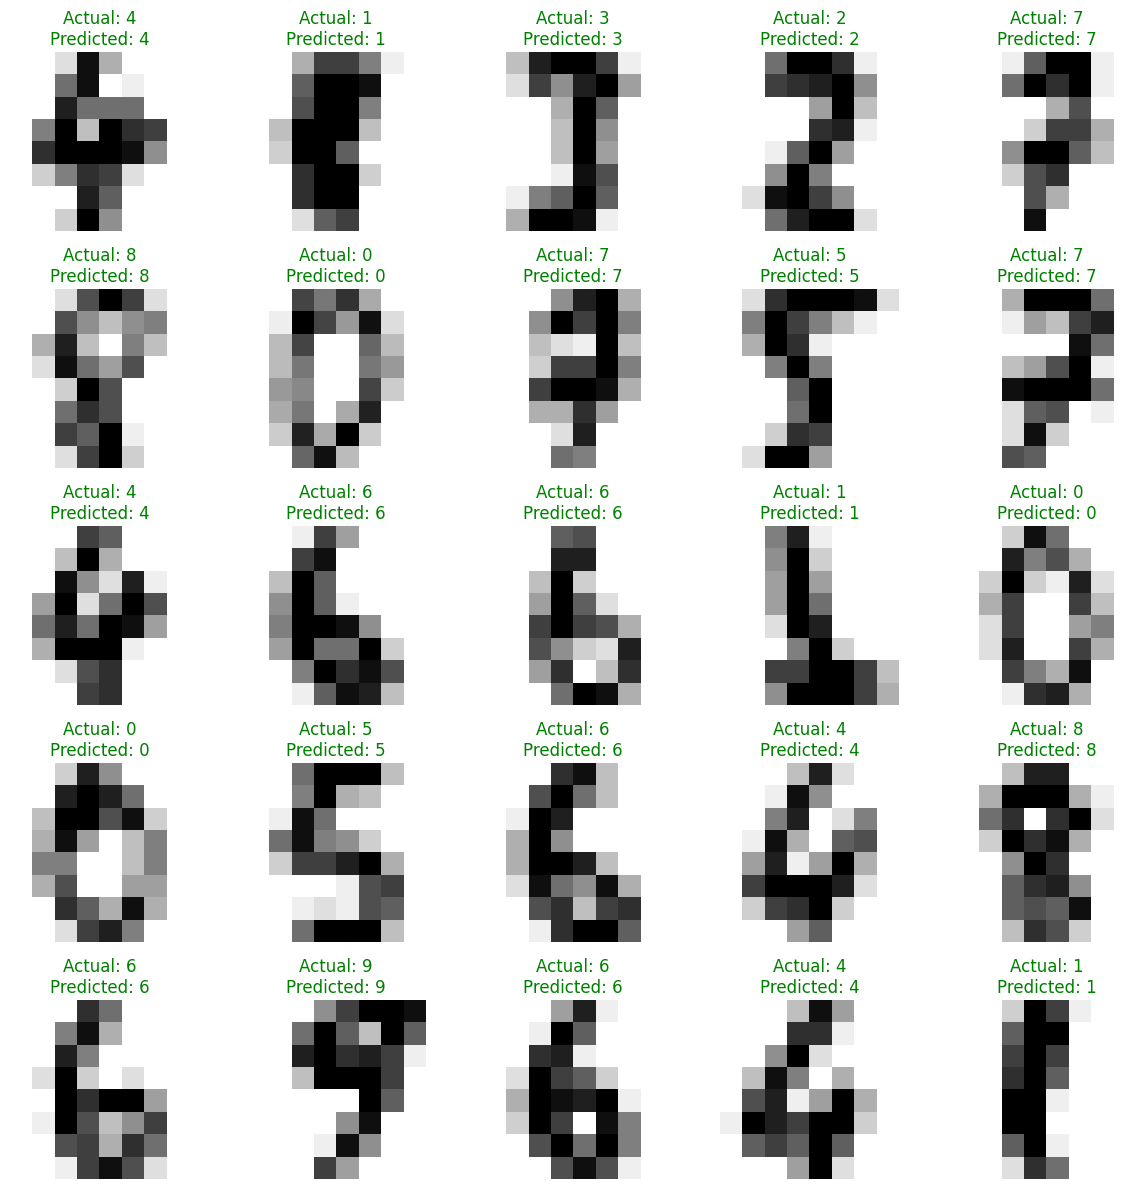

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from random import sample

# Ensure model_digits and dataset are available from previous cells
# If this cell is run independently, you might need to re-run the training cell (oQ8BQK5ix6At)
# For safety, let's assume they are available from the kernel state.

# Set the model to evaluation mode
model_digits.eval()

# Get a random selection of 25 indices from the dataset
num_samples = 25
random_indices = sample(range(len(dataset)), num_samples)

fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(12, 12))
axes = axes.flatten() # Flatten the 5x5 array of axes for easy iteration

with torch.no_grad(): # Disable gradient calculation for inference
    for i, idx in enumerate(random_indices):
        # Get the input image and actual label
        image_data, actual_label = dataset[idx]

        # Reshape for display (8x8) and model input (1x64)
        image_display = image_data.reshape(8, 8).cpu().numpy()
        image_input = image_data.unsqueeze(0) # Add batch dimension

        # Get model prediction
        output = model_digits(image_input)
        _, predicted_label = torch.max(output, 1)

        # Plot the image
        axes[i].imshow(image_display, cmap='gray_r')
        axes[i].set_title(f"Actual: {actual_label.item()}\nPredicted: {predicted_label.item()}",
                          color='green' if actual_label.item() == predicted_label.item() else 'red')
        axes[i].axis('off') # Hide axes ticks and labels

plt.tight_layout()
plt.show()
